In [ ]:
#load in data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/train.csv')

dtest= pd.read_csv('./data/test.csv')

#convert to dataframe

df = pd.DataFrame(df)
dtest= pd.DataFrame(dtest)

#check for missing values

#get missing values
df.isnull().sum()

#drop missing values 


df = df.dropna()

df.head()


/Users/edonamujaj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on testing set =  0.6398229740221175
RMSE root mean square error on testing set: 0.9183025827617913


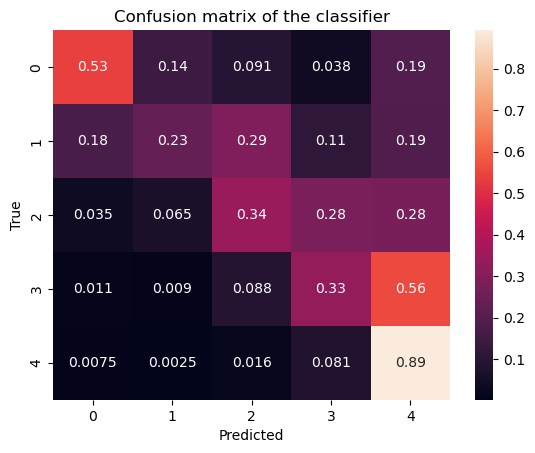

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = pd.read_csv("./data/X_train.csv")
#filter out nan values in X_train
X_train = X_train[X_train['Text'].notnull()]

Xsubmit= pd.read_csv("./data/X_test.csv")

X_sample = X_train.sample(frac=0.4, replace=True, random_state=1)


vector= TfidfVectorizer(max_df=0.95).fit(X_sample['Text'])
X_trainV = vector.transform(X_train['Text'])

X_subV = vector.transform(Xsubmit['Text'])


X_train,X_test,y_train,y_test = train_test_split(X_trainV,X_train['Score'],test_size= 0.2)

model = LogisticRegression()

model.fit(X_train,y_train)

pred = model.predict(X_test)
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(y_test, pred))
print("RMSE root mean square error on testing set:" , mean_squared_error(y_test, pred))

# Plot a confusion matrix
cm = confusion_matrix(y_test, pred, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Xsubmit['Score']= model.predict(X_subV)

# Create the submission file
submission = Xsubmit[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)